In [15]:
import datetime
import time
import numpy as np
import pickle
import os

# Add the path to the LaTeX distribution to the PATH environment variable
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import matplotlib.pyplot as plt

In [16]:
# Unpickling the object
with open('../Result/para_results_2025-08-2_17_02_parameters.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

In [17]:
n = loaded_object['n']
alpha_list = loaded_object['alpha_list']
rho_list = loaded_object['rho_list']
result = loaded_object['result']
u_opt = loaded_object['u_opt']
v_opt = loaded_object['v_opt']
time_step = loaded_object['time_step']

In [18]:

format = ['-', '-.', '--', '*-','o-']

1.0


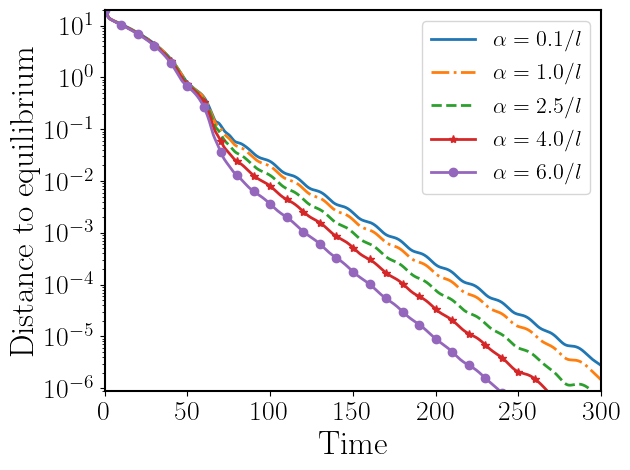

In [19]:
################# different alpha #################
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})
for rho in rho_list:
    plt.figure()
    print(rho)
    flag = 0
    for alpha in alpha_list:
        res = result[alpha][rho]
        u_bar, v_bar = res[:,:3*n], res[:,3*n:]
        x_bar, z_bar_pos, z_bar_neg, y_bar, w_bar_pos, w_bar_neg= res[:,0:n], res[:,n:2*n], res[:,2*n:3*n], res[:,3*n:4*n], res[:,4*n:5*n], res[:,5*n:6*n]
        len = u_bar.shape[0]

        I = np.eye(n)
        len = u_bar.shape[0]
        len_draw = int(1.0*len)
        all_draw = res[:len_draw,:]
        A = np.block([[I, -I, I], [np.zeros((2*n,n)), -np.eye(2*n)]])
        u_bar_star = u_opt + alpha* A.T@v_opt
        all_star = np.hstack((u_bar_star,v_opt))
        # print("Our result:\n", res[-1],'\n','Gurobi results:\n', all_star)
        plt.plot(time_step[:len_draw],np.linalg.norm(all_draw-all_star,axis=1),format[flag],markevery=n*5,linewidth=2.0)
        plt.yscale("log")
        plt.margins(x=0)
        flag += 1
    # legend=[r'$\alpha = 0.1/l$',r'$\alpha = 0.5/l$' , r'$\alpha = 1.0/l$', r'$\alpha = 4.0/l$', r'$\alpha = 6.0/l$']
    legend=[r'$\alpha = 0.1/l$',r'$\alpha = 1.0/l$',r'$\alpha = 2.5/l$' ,  r'$\alpha = 4.0/l$', r'$\alpha = 6.0/l$']
    font = {'family':'Times New Roman', 'size':16}
    plt.legend(legend,prop=font)
    plt.xlabel('Time', font={'family':'Times New Roman', 'size':24})
    plt.ylabel("Distance to equilibrium", font={'family':'Times New Roman', 'size':24})
    plt.xticks(fontproperties = 'Times New Roman', size = 20)
    plt.yticks(fontproperties = 'Times New Roman', size = 20)
    plt.ylim(1e-6-1e-7,1e1+10)
    plt.xlim(0,300)
    # plt.title(r'Error ($\rho={}$)'.format(rho), font={'family':'Times New Roman', 'size':16})
    # plt.title('Error', font={'family':'Times New Roman', 'size':16})
    #设置图框线粗细
    bwith = 1.5#边框宽度设置为2
    TK = plt.gca()#获取边框
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    plt.tight_layout()  # 自动调整子图参数以适应图形区域
    # now = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    plt.savefig('../Fig/Error_{}.pdf'.format(rho),dpi=1200)
    plt.show()


In [20]:
plt.figure()
legend1 = []
legend2 = []
legend3 = []
for i in range(6*n):
    if i<n:
        legend1.append('$\\bar{x}_'+str(i)+'$')
    elif i<2*n:
        legend2.append('$\\bar{z}^{+}_'+str(i-n)+'$')
    elif i<3*n:
        legend2.append('$\\bar{z}^{-}_'+str(i-2*n)+'$')
    elif i<4*n:
        legend1.append('$\\bar{y}_'+str(i-3*n)+'$')
    elif i>=4*n and i<5*n:
        legend3.append('$\\bar{w}^{+}_'+str(i-4*n)+'$')
    elif i>=5*n:
        legend3.append('$\\bar{w}^{-}_'+str(i-5*n)+'$')
x_star = u_opt[:n]
y_star = v_opt[:n]
x_bar_star = x_star + alpha_list[0]*y_star
res = result[alpha_list[0]][5]
# print(res[-1])
u_bar, v_bar = res[:,:3*n], res[:,3*n:]
x_bar, z_bar_pos, z_bar_neg, y_bar, w_bar_pos, w_bar_neg= res[:,0:n], res[:,n:2*n], res[:,2*n:3*n], res[:,3*n:4*n], res[:,4*n:5*n], res[:,5*n:6*n]
len_draw = int(0.1*u_bar.shape[0])
p1 = plt.plot(time_step[:len_draw],x_bar[:len_draw])
# plt.axhline(x_bar_star[0], color='r', linestyle=':')
# plt.axhline(x_bar_star[1], color='r', linestyle=':')
# plt.grid()
plt.margins(x=0)
font = {'family':'Times New Roman', 'size':12}

p1 = plt.plot(time_eval,res1)
p2 = plt.plot(time_eval,res2,'--')
p3 = plt.plot(time_eval,res3,':')
# p4 = plt.plot(t,y,'-.')
# plt.grid()
plt.margins(x=0)
font = {'family':'Times New Roman', 'size':12}

a1 = plt.legend(p1,legend1,prop=font, loc='upper left')
a2 = plt.legend(p2,legend2,prop=font, loc='upper center')
plt.legend(p3,legend3,prop=font,loc='upper right')

plt.gca().add_artist(a1)
plt.gca().add_artist(a2)


plt.xlabel('Time', font={'family':'Times New Roman', 'size':24})
plt.ylabel('Variables', font={'family':'Times New Roman', 'size':24})
plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 20)

#设置图框线粗细
bwith = 1#边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
now = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
plt.savefig('../Fig/{} Variable_x_bar_{}.pdf'.format(now,rho),dpi=1200)
plt.show()

KeyError: 5

<Figure size 640x480 with 0 Axes>